# Stabilnost sustava

Sadržaj vježbe:
U prvom dijelu, definira se linearni proces (preko prijenosne funkcije) i prikazuju njegova svojstva.
Procesu se potom dodaje P regulator i analiziraju se svojstva ukupnog procesa s povratnom vezom.

Cilj vježbe je zaključiti kako dodavanje regulatora i zatvaranje povratne veze utječe na stabilnost procesa.

In [2]:
# priprema okruženja
%matplotlib widget
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import control

import ipywidgets as ipw

## 1. Proces

Definicija prijenosne funkcije procesa

- kad dođete do kraja možete ponoviti postupak za neki drugi proces (primjeri su ispod)


In [23]:

s=control.tf([1, 0], [1])

Gp = 1/((s*s+2*s+2)*(s+3))

#Gp = control.tf([1], [1, 3, 3, 1])
#Gp = control.tf([1], [1, 1])
#Gp = control.tf([1], [1, 2, 1])
#Gp = control.tf([1], [1, -1])

print("Gp = ")
Gp

Gp = 


TransferFunction(array([1]), array([1, 5, 8, 6]))

Proučimo karakteristike procesa:
- polovi i nule (stabilnost)
- odziv na skokovitu pobudu
- bode plot (frekvencijska karakteristika)


In [24]:
print("polovi: {}".format(Gp.pole()))
print("nule: {}".format(Gp.zero()))

polovi: [-3.+0.j -1.+1.j -1.-1.j]
nule: []


Na sljedećem dijagramu nacrtan je položaj polova i nula prijenosne funkcije. Ako su svi polovi negativni (u lijevoj poluravnini), sustav je stabilan.

(array([-3.+0.j, -1.+1.j, -1.-1.j]), array([], dtype=complex128))

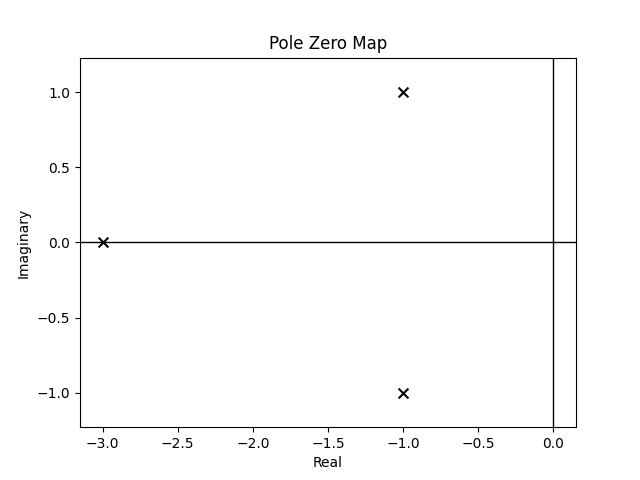

In [27]:
# dijagram polova i nula
fig = plt.figure()
control.pzmap(Gp)

Za prijenosnu funkciju

$G_p(s) = \frac{1}{s^3+5s^2+8s+6}$

polovi su
$p_1 = 3$, 
$p_{2,3} = -1\pm j$

Svi polovi imaju negativan realan dio, pa možemo zaključiti da je proces stabilan.

U nastavku ćemo iscrtati odziv na skokovitu pobudu da potvrdimo stabilnost.

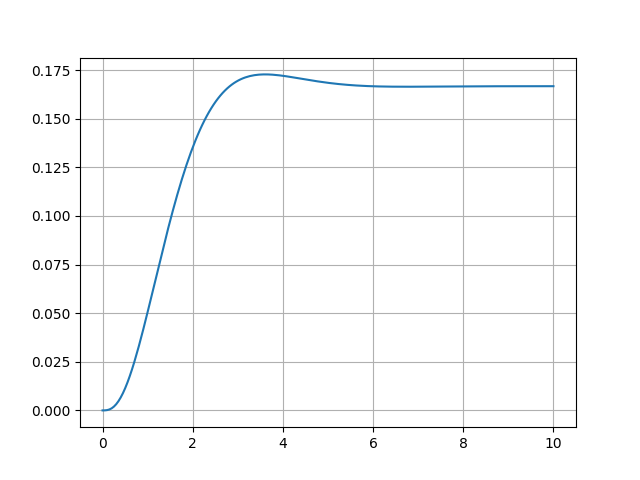

In [28]:
# odziv procesa na skokovitu pobudu

T = np.linspace(0, 10, 200)
tout,yout = control.step_response(Gp, T)
# vremenski odziv
fig = plt.figure()
fig.set_label('Odziv procesa na skokovitu pobudu')

plt.plot(tout,yout)
plt.grid()
plt.show()

## 2. Kontroler

Kontroler kojeg ćemo dodati je jednostavni P kontroler. Pojačanje kontrolera zadaje se varijablom Kr.

$G_r(s) = Kr$

In [29]:
# model kontrolera
Kr = 10
Gr = control.tf([Kr], [1])
Gr

TransferFunction(array([10]), array([1]))

Nakon definicije kontrolera tražimo ukupnu prijenosnu funkciju zatvorenog sustava upravljanja.

$Gz = \frac{GrGp}{1+GrGp}$

Na prijenosnoj funkciji zatvorenog sustava provest ćemo istu analizu kao na početnom procesu.

In [30]:
# zatvoreni sustav
Gz = control.feedback(Gr*Gp)
print("Gz = ")
Gz

Gz = 


TransferFunction(array([10]), array([ 1,  5,  8, 16]))

In [31]:
# polovi zatvorenog sustava
print("polovi: {}".format(Gz.pole()))
print("nule: {}".format(Gz.zero()))

polovi: [-4. +0.j         -0.5+1.93649167j -0.5-1.93649167j]
nule: []


(array([-4. +0.j        , -0.5+1.93649167j, -0.5-1.93649167j]),
 array([], dtype=complex128))

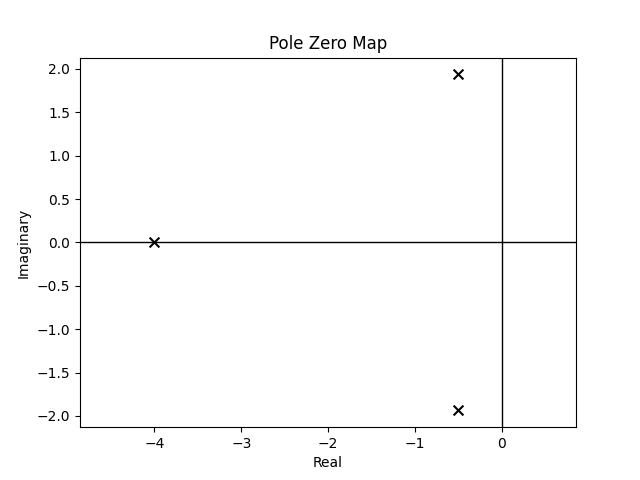

In [32]:
# dijagram polova i nula
fig = plt.figure()
control.pzmap(Gz)

Možemo uočiti da su se polovi "pomaknuli" u odnosu na početni sustav, no još su uvijek u stabilnom području. Polovi koji imaju imaginarni dio (kompleksno konjugirani) su se primakli 0, dok se lijevi pol udaljio.

Što je sa vremenskim odzivom procesa?

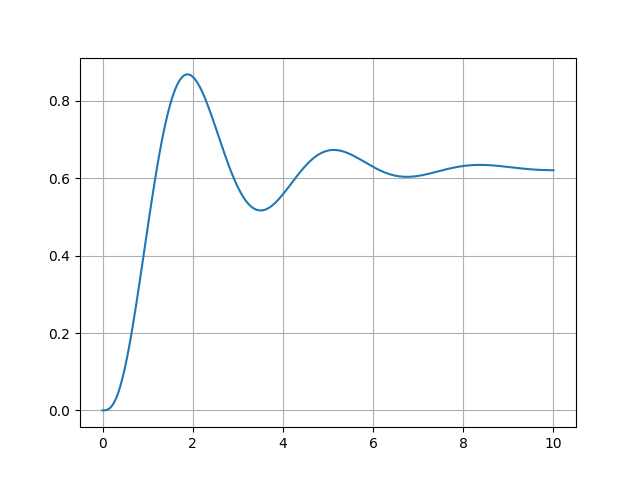

In [33]:
# odziv procesa na skokovitu pobudu
T = np.linspace(0, 10, 200)
tout,yout = control.step_response(Gz, T)
# vremenski odziv
fig = plt.figure()
fig.set_label('Odziv zatvorenog procesa na skokovitu pobudu')

plt.plot(tout,yout)
plt.grid()
plt.show()

Vidimo da je odziv oscilatorniji u odnosu na proces (no još uvijek stabilan). Oscilatornost je posljedica dva para polova koji su se približili y-osi.

Sada se vratite na prvo polje ispod naslova "2. Kontroler" i postavite Kr=20. Pokrenite sva polja do ove točke i usporedite što se dogodilo s polovima i odzivima.
Rezultat: polovi su se dodatno razmaknuli, desni par se približio nuli, oscilacije odziva se se povećale.

Pokušajte ponavljati proces dok ne nađete pojačanje na kojem su polovi na y-osi. Kako izgleda vremenski odziv u tom slučaju?

Konačno, odaberite vrijednost Kr = 50 i još jednom ponovite postupak. Za taj slučaj, par polova postaje pozitivan, zatvoreni sustav upravljanja je nestabilan te se odziv rastitrava.

Zaključak:
- za odabrani proces i regulator parametar regulatora ima utjecaj na stabilnost procesa. 
- ako znamo prijenosne funkcije procesa i regulatora, možemo utvrditi stabilnost
- u ovom slučaju, da bi ukupni proces bio stabilan, regulator mora imati pojačanje K manje od određenog iznosa.


## 3. Analiza u otvorenoj petlji

U proteklom primjeru računali smo prijenosnu funkciju zatvorenog sustava da bismo na njoj utvrdili stabilnost (preko položaja polova).

Jedna od metoda određivanja stabilnosti bez računanja ukupne prijenosne funkcije je bode-ov kriterij stabilnosti.

Prvo ćemo odrediti prijenosnu funkciju otvorenog kruga (odnosno prijenosnu funkciju svih elemenata od ulaza do kraja povratne veze, ali bez zatvaranja kruga):
$G_o(s) = G_r(s) G_p(s)$

In [34]:
#ponavljamo definiciju regulatora da se ne moramo vraćati gore
# model kontrolera
Kr = 10
Gr = control.tf([Kr], [1])
Gr

TransferFunction(array([10]), array([1]))

In [35]:
#Kr = 1

Go = Gr*Gp
print("Go = ")
Go

Go = 


TransferFunction(array([10]), array([1, 5, 8, 6]))

Iscrtat ćemo bode dijagram (frekvencijsku karakteristiku) prijenosne funkcije otvorenog kruga. 
Na dijagramu ćemo pročitati koliko iznosi pojačanje ako je fazni pomak -180°.

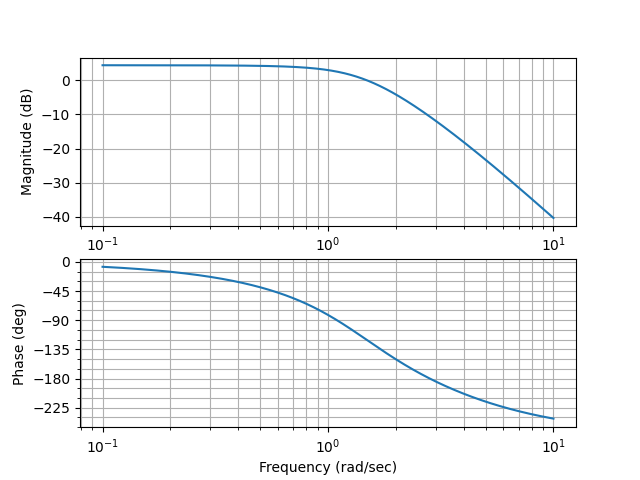

In [36]:
plt.figure()
mag, phi, w = control.bode_plot(Go, dB=True)
plt.show()

In [37]:
iw_phi180 = np.argmax(phi<-np.pi)
mag_w_phi180= 20*np.log10(mag[iw_phi180])
print("Frekevencija kod phi=-180: {}".format(w[iw_phi180]))
print("Pojačanje kod phi=-180: {}".format(mag_w_phi180))

Frekevencija kod phi=-180: 2.840883690183303
Pojačanje kod phi=-180: -10.719466968824907


Za proces

$G_p(s) = \frac{1}{s^3+5s^2+8s+6}$ 

i regulator

$G_r(s) = 5$

pojačanje iznosi približno -17db. Pojačanje manje od 0dB znači da će izlazni signal biti prigušen u odnosu na ulazi. U našem slučaju to znači da će proces biti stabilan kad zatvorimo povratnu vezu.

Ukoliko bi pojačanje pri faznom pomaku od -180° bilo veće od 0dB, proces bi po zatvaranju povratne veze postao nestabilan.

Za naš proces to znači da ako regulator pojačamo za 19db, destabilizirat ćemo sustav. Drugim riječima fazno osiguranje ovog sustava je 17dB.

Pogledajmo o kojoj se vrijednosti regulatora radi:


In [38]:
def db2gain(db):
    return 10**(db/20)

db2gain(31.5)

37.583740428844415

Pomnožimo početni Kr=5 s ovim pojačanjem:

In [39]:
5*7.08

35.4

Ovo je upravo vrijednost pojačanja za koju ste u prethodnom poglavlju dobili odziv sa neprigušenim oscilacijama (odziv na rubu stabilnosti).

Na ovaj način uspjeli smo utvrditi stabilnost zatvorenog sustava upravljanja bez računanja ukupne prijenosne funkcije. Također smo zaključili koliko možemo povećati pojačanje regulatora prije nego što ukupni proces postane nestabilan.

Isti postupak mogli smo primijeniti i za bilo koji drugi tip regulatora (npr PI regulator). I tada možemo izvoditi zaključke o utjecaju promjene pojačanja regulatora na ukupni proces.